In [1]:
import os
import glob
import time

import pandas as pd
import numpy as np
import xarray as xr
from scipy.ndimage import gaussian_filter


import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import cartopy.crs as ccrs
import cartopy

from scipy.stats import t,linregress,pearsonr

from precip_model_functions import *

/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


# Precip model

In [3]:
nepal=box["nepal"]["medium"]

d="20011003"
#Get the five days around d
dp = pd.to_datetime(d, format='%Y%m%d')
d5 = [(dp + pd.Timedelta(days=i)).strftime("%Y%m%d") for i in range(-2,3)]  

pr1,pr2,_ = precip_model_surface(d5,nepal)

48.38933801651001
53.32534146308899


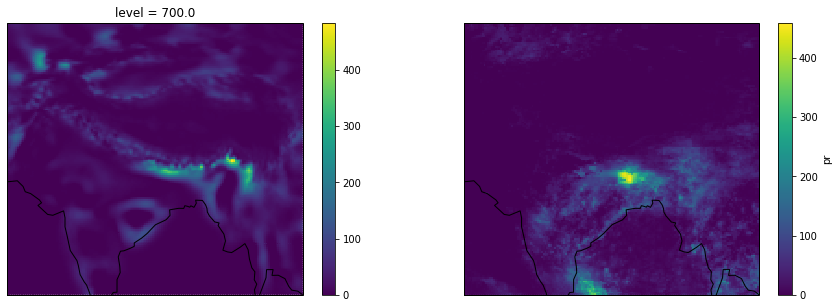

In [4]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),subplot_kw={'projection': ccrs.PlateCarree()})

M=400
ax1.coastlines()
pr2.plot(ax=ax1,transform=ccrs.PlateCarree())#,levels=np.linspace(0,M), cbar_kwargs={"ticks": np.linspace(0,M,11)})
ax1.set_extent(nepal)

prtrmm = precipTRMM5d("20011003",nepal)
ax2.coastlines()
prtrmm.plot(ax=ax2,transform=ccrs.PlateCarree())
ax2.set_extent(nepal)


In [ ]:
def compute3precip(ds,latlon,ct=""):
    pr_era5s,pr_upss,pr_trmms = [],[],[]

    for d in ds :
        pr_era5,pr_ups,omega = precip_model_surface(d,latlon)
        
        pr_era5.to_netcdf("/global/cscratch1/sd/qnicolas/precipmodel/rx5/pr/pr.omegaERA5700Xqs.%s.%s.nc"%(d,ct))
        pr_ups.to_netcdf("/global/cscratch1/sd/qnicolas/precipmodel/rx5/pr/pr.omegaupslope700Xqs.%s.%s.nc"%(d,ct))
        omega.to_netcdf("/global/cscratch1/sd/qnicolas/precipmodel/rx5/pr/omega/e5.omegaupslope700.%s.%s.nc"%(d,ct))
        
        pr_era5s.append(spacemean_era5(pr_era5,latlon))
        pr_upss.append(spacemean_era5(pr_ups,latlon))
        pr_trmms.append(spacemean_trmm(precipTRMM5d(d,latlon),latlon))        
    return pr_era5s,pr_upss,pr_trmms

#compute3precip(rx5["Sandes"],box["Sandes"]["small"],"Sandes")
prCan_era5_qs,prCan_ups_qs ,prCan_trmm = compute3precip(rx5["Candes"],box["Candes"]["medium"],"Candes")

96.44896936416626
104.13555431365967
102.9714527130127
110.55903720855713
87.51037812232971
92.30386734008789
74.16348767280579
82.09579133987427
98.77041864395142
105.59400129318237
102.10105538368225
109.69721937179565
78.30409026145935
82.84095358848572
82.8478057384491
90.55310463905334
98.32865953445435
105.94371294975281
100.27958917617798
107.70060133934021
72.97874665260315
77.8016242980957


In [8]:
prnep= retrieve_modeled_precip_rx5(rx5["nepal"],box["nepal"]["small"],"nepal",["omegaERA5700Xqs","omegaupslope700Xqs"])
prnep_era5_qs    = prnep[0,:]
prnep_ups_qs     = prnep[1,:]
prnep_trmm       = prnep[2,:]

prchi= retrieve_modeled_precip_rx5(rx5["chile"],box["chile"]["small"],"chile",["omegaERA5700Xqs","omegaupslope700Xqs"])
prchi_era5_qs    = prchi[0,:]
prchi_ups_qs     = prchi[1,:]
prchi_trmm       = prchi[2,:]




Text(0.5, 1.0, 'nepal rx5')

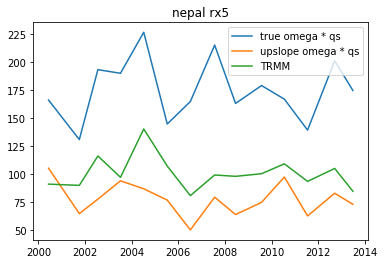

In [9]:
days=rx5_datetime["nepal"]
plt.plot(days,np.array(prnep_era5_qs)   ,label="true omega * qs")
plt.plot(days,np.array(prnep_ups_qs)   ,label="upslope omega * qs")
plt.plot(days,np.array(prnep_trmm),label="TRMM")
plt.legend()
plt.title("Nepal rx5")
None

Text(0.5, 1.0, 'chile rx5')

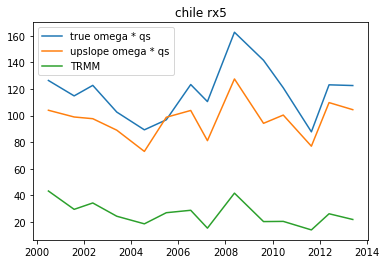

In [10]:
days=rx5_datetime["chile"]
plt.plot(days,np.array(prchi_era5_qs)   ,label="true omega * qs")
plt.plot(days,np.array(prchi_ups_qs)   ,label="upslope omega * qs")
plt.plot(days,np.array(prchi_trmm),label="TRMM")
plt.legend()
plt.title("chile rx5")
None

In [4]:
prSan= retrieve_modeled_precip_rx5(rx5["Sandes"],box["Sandes"]["small"],"Sandes",["omegaERA5700Xqs","omegaupslope700Xqs"])
prSan_era5_qs    = prSan[0,:]
prSan_ups_qs     = prSan[1,:]
prSan_trmm       = prSan[2,:]

Text(0.5, 1.0, 'South Andes rx5')

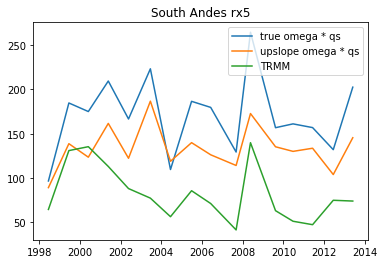

In [7]:
days=rx5_datetime["Sandes"]
plt.plot(days,np.array(prSan_era5_qs)   ,label="true omega * qs")
plt.plot(days,np.array(prSan_ups_qs)   ,label="upslope omega * qs")
plt.plot(days,np.array(prSan_trmm),label="TRMM")
plt.legend()
plt.title("South Andes rx5")

In [2]:
prCan= retrieve_modeled_precip_rx5(rx5["Candes"],box["Candes"]["small"],"Candes",["omegaERA5700Xqs","omegaupslope700Xqs"])
prCan_era5_qs    = prCan[0,:]
prCan_ups_qs     = prCan[1,:]
prCan_trmm       = prCan[2,:]

Text(0.5, 1.0, 'Central Andes rx5')

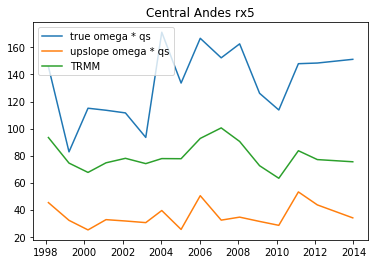

In [4]:
days=rx5_datetime["Candes"]
plt.plot(days,np.array(prCan_era5_qs)   ,label="true omega * qs")
plt.plot(days,np.array(prCan_ups_qs)   ,label="upslope omega * qs")
plt.plot(days,np.array(prCan_trmm),label="TRMM")
plt.legend()
plt.title("Central Andes rx5")

## Spatial view

In [211]:
allpr1=[]
prtrmm=[]
ct="chile"
for d in rx5["chile"]:
    allpr1.append(xr.open_dataset("/global/cscratch1/sd/qnicolas/precipmodel/rx5/pr/pr.omegaupslopeXqs.700hpa.%s.%s.nc"%(d,ct)))
    prtrmm.append(precipTRMM5d(d,box["chile"]["medium"]))
allpr1 = xr.concat(allpr1,'time').__xarray_dataarray_variable__
prtrmm = xr.concat(prtrmm,'time')



In [212]:
#REGRID
prtrmm=prtrmm.rename({'lat': 'latitude','lon': 'longitude'}).interp_like(allpr1).fillna(0.)

/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Text(0.5, 1.0, 'linear regression slope')

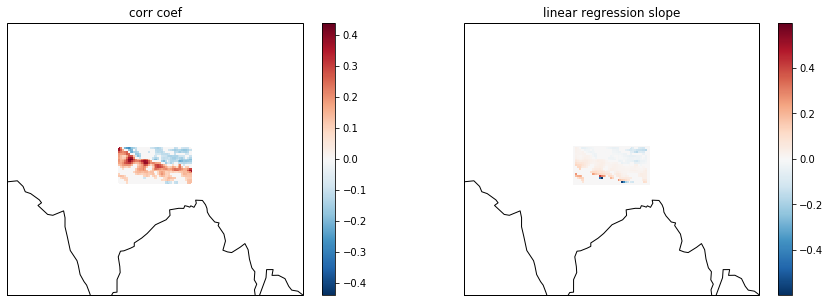

In [199]:
nepal=box["nepal"]["medium"]
c=xr.apply_ufunc(corrc,allpr1,prtrmm,input_core_dims=[['time'], ['time']],vectorize=True)
p=xr.apply_ufunc(corrp,allpr1,prtrmm,input_core_dims=[['time'], ['time']],vectorize=True)
cp = c*(1*(p<0.05))

l=xr.apply_ufunc(lr,allpr1,prtrmm,input_core_dims=[['time'], ['time']],vectorize=True)
p=xr.apply_ufunc(lrp,allpr1,prtrmm,input_core_dims=[['time'], ['time']],vectorize=True)
lp = l*(1*(p<0.05))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),subplot_kw={'projection': ccrs.PlateCarree()})

ax1.coastlines()
cp.plot(ax=ax1,transform=ccrs.PlateCarree())
ax1.set_extent(nepal)
ax1.set_title("corr coef")

ax2.coastlines()
lp.plot(ax=ax2,transform=ccrs.PlateCarree())
ax2.set_extent(nepal)
ax2.set_title("linear regression slope")

Text(0.5, 1.0, 'linear regression slope')

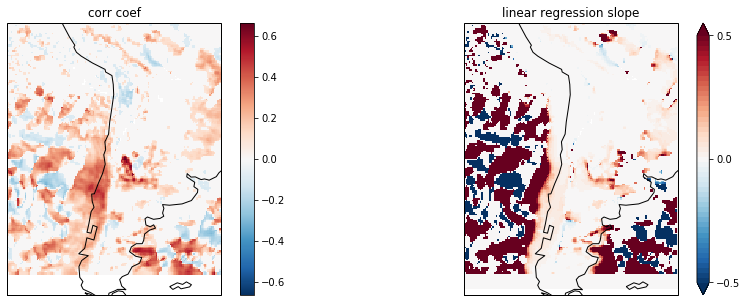

In [218]:
#c=xr.apply_ufunc(corrc,allpr1,prtrmm,input_core_dims=[['time'], ['time']],vectorize=True)
#p=xr.apply_ufunc(corrp,allpr1,prtrmm,input_core_dims=[['time'], ['time']],vectorize=True)
#cp = c*(1*(p<0.05))
#
#l=xr.apply_ufunc(lr,allpr1,prtrmm,input_core_dims=[['time'], ['time']],vectorize=True)
#p=xr.apply_ufunc(lrp,allpr1,prtrmm,input_core_dims=[['time'], ['time']],vectorize=True)
#lp = l*(1*(p<0.05))
chile=box["chile"]["medium"]
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),subplot_kw={'projection': ccrs.PlateCarree()})

ax1.coastlines()
cp.plot(ax=ax1,transform=ccrs.PlateCarree())
ax1.set_extent(chile)
ax1.set_title("corr coef")

ax2.coastlines()
lp.plot(ax=ax2,transform=ccrs.PlateCarree(),levels=np.linspace(-.5,.5),cbar_kwargs={"ticks": np.linspace(-1.,1.,5)})
ax2.set_extent(chile)
ax2.set_title("linear regression slope")

Text(0.5, 1.0, 'corr coef')

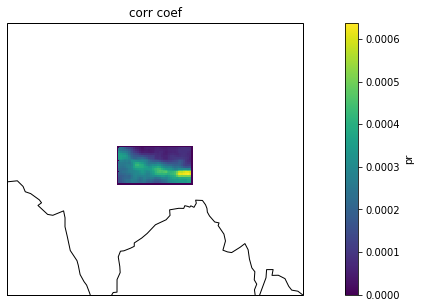

In [191]:
prtrmmm=prtrmm.mean("time")
plt.figure(figsize=(15,5))
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines()
prtrmmm.plot(ax=ax1,transform=ccrs.PlateCarree())
ax1.set_extent(nepal)
ax1.set_title("corr coef")

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5),subplot_kw={'projection': ccrs.PlateCarree()})

extent=2

ax1.coastlines()
w1_500.plot(ax=ax1,transform=ccrs.PlateCarree(),levels=np.linspace(-extent,extent,50))
ax1.set_extent(country)
ax1.set_title("true omega")

ax2.coastlines()
w2_500.plot(ax=ax2,transform=ccrs.PlateCarree(),levels=np.linspace(-extent,extent,50))
ax2.set_extent(country)
ax2.set_title("upslope flow")